In [ ]:
import pandas as pd
import numpy as np
import time
import random as rnd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math
from datetime import datetime
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score


In [ ]:
!pip install dython
from dython.nominal import associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X=pd.read_csv('secondary_data.csv')
X.shape[0]
X.shape[1]

21

In [ ]:
X.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
#Checking for number of null values
X.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Dropping columns with more than 50% values null

In [ ]:
X.drop(columns=['stem-root','veil-type','veil-color','spore-print-color','gill-spacing','stem-surface'],inplace=True)

In [ ]:
X.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [ ]:
X.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season
count,61069,61069,46949,61069,61069,51185,61069,61069,61069,58598,61069,61069
unique,2,7,11,12,2,7,12,13,2,8,8,4
top,p,x,t,n,f,a,w,w,f,f,d,a
freq,33888,26934,8196,24218,50479,12698,18521,22926,45890,48361,44209,30177


In [ ]:
X.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [ ]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 8.7 MB/s 
     |████████████████████████████████| 9.8 MB 57.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(variables=['cap-surface'], imputation_method='frequent')
imputer.fit(X)
X = imputer.transform(X)

imputer = CategoricalImputer(variables=['gill-attachment'], imputation_method='frequent')
imputer.fit(X)
X = imputer.transform(X)

imputer = CategoricalImputer(variables=['ring-type'], imputation_method='frequent')
imputer.fit(X)
X = imputer.transform(X)


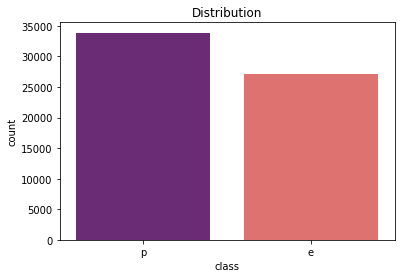

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'class', data = X, palette = "magma")
plt.title("Distribution")
plt.show()

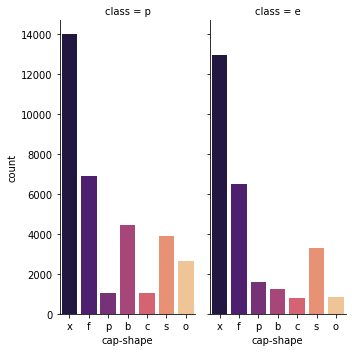

In [ ]:
sns.catplot(x="cap-shape",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

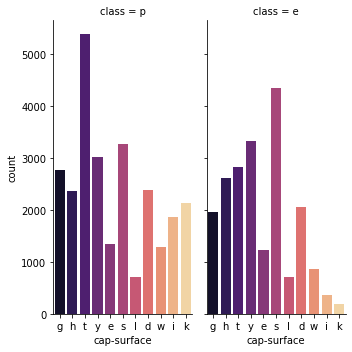

In [ ]:
sns.catplot(x="cap-surface",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

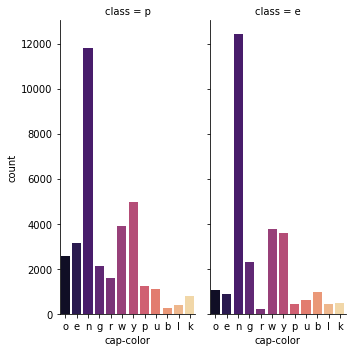

In [ ]:
sns.catplot(x="cap-color",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

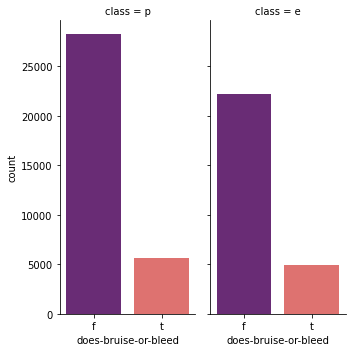

In [ ]:
sns.catplot(x="does-bruise-or-bleed",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

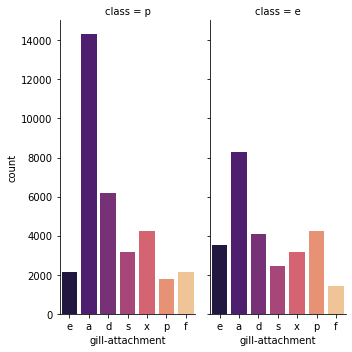

In [ ]:
sns.catplot(x="gill-attachment",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

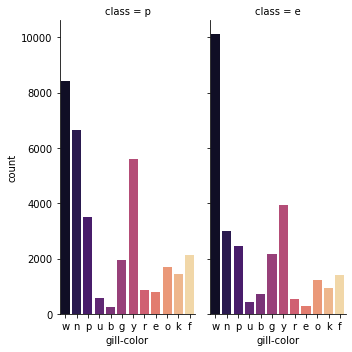

In [ ]:
sns.catplot(x="gill-color",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

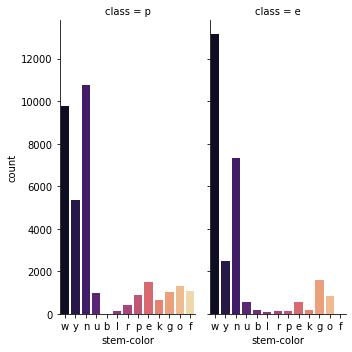

In [ ]:
sns.catplot(x="stem-color",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

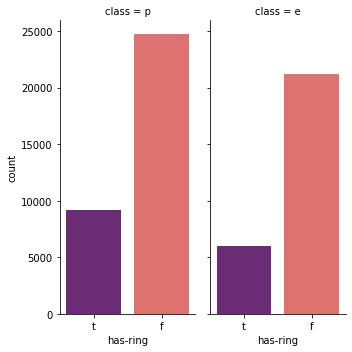

In [ ]:
sns.catplot(x="has-ring",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

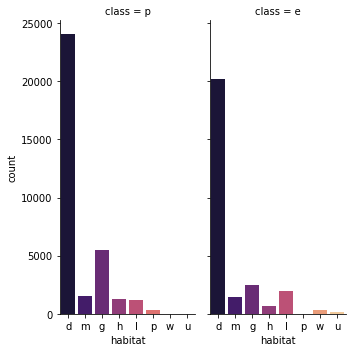

In [ ]:
sns.catplot(x="habitat",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

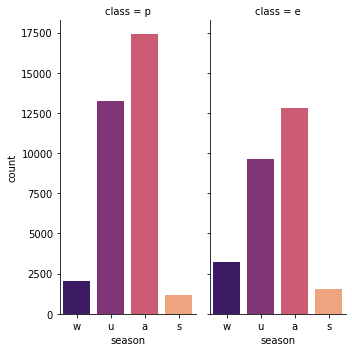

In [ ]:
sns.catplot(x="season",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

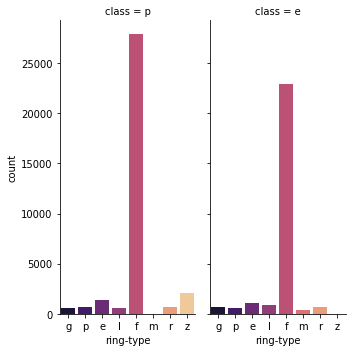

In [ ]:
sns.catplot(x="ring-type",col='class',kind="count",palette = "magma", data=X,aspect=0.5)

         count      mean       std   min   25%   50%   75%    max
class                                                            
e      27181.0  7.798696  6.373404  0.53  4.29  6.71  9.41  62.34
p      33888.0  5.879763  3.966391  0.38  3.04  4.98  7.85  30.34


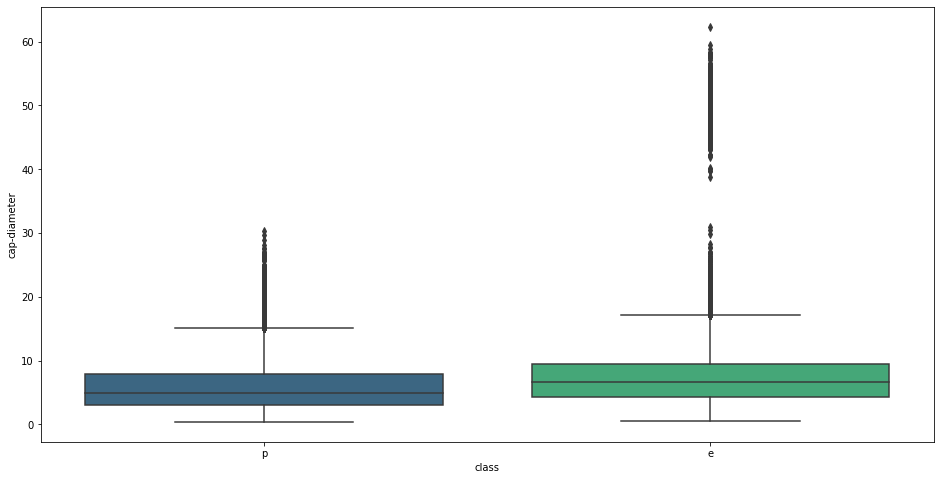

In [ ]:
print(X.groupby('class')['cap-diameter'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=X, x='class', y='cap-diameter',palette='viridis')
plt.show()

         count      mean       std  min   25%   50%   75%    max
class                                                           
e      27181.0  7.039077  3.583433  2.0  5.08  6.24  7.74  33.92
p      33888.0  6.214554  3.140778  0.0  4.21  5.63  7.74  20.19


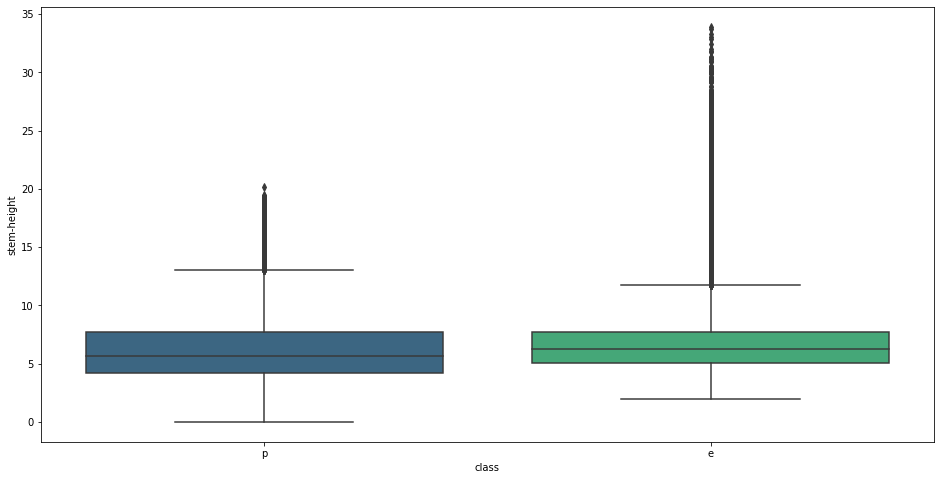

In [ ]:
print(X.groupby('class')['stem-height'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=X, x='class', y='stem-height',palette='viridis')
plt.show()

         count       mean        std   min   25%    50%    75%     max
class                                                                 
e      27181.0  14.361084  11.042703  0.74  7.13  12.59  18.39  103.91
p      33888.0  10.375463   8.753975  0.00  3.58   7.66  14.34   58.95


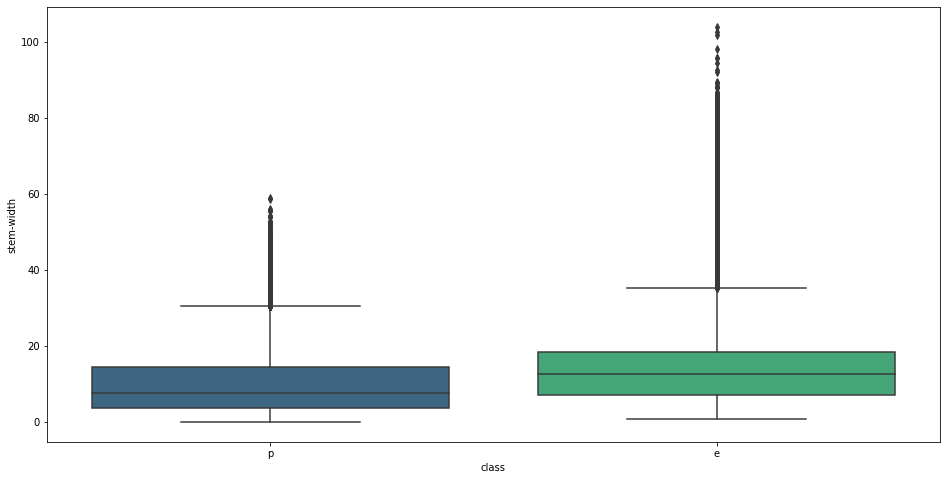

In [ ]:
print(X.groupby('class')['stem-width'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=X, x='class', y='stem-width',palette='viridis')
plt.show()

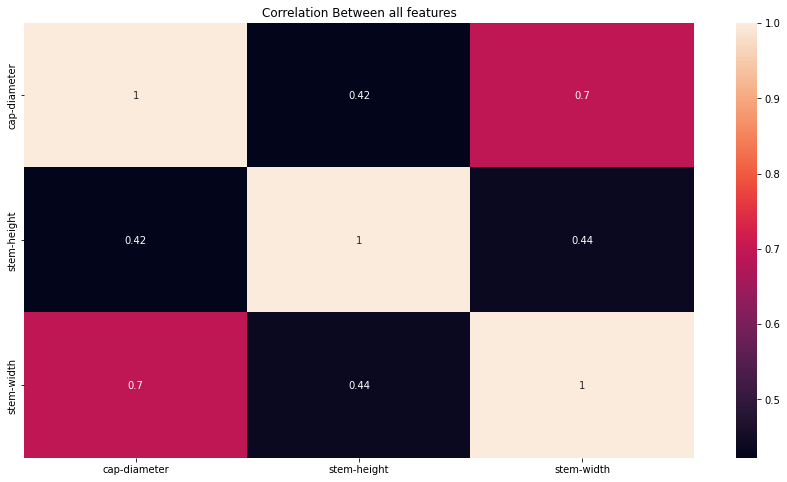

In [ ]:
#Correlation between features
plt.figure(figsize=(15, 8))
sns.color_palette("mako", as_cmap=True)
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Between all features")
plt.show()

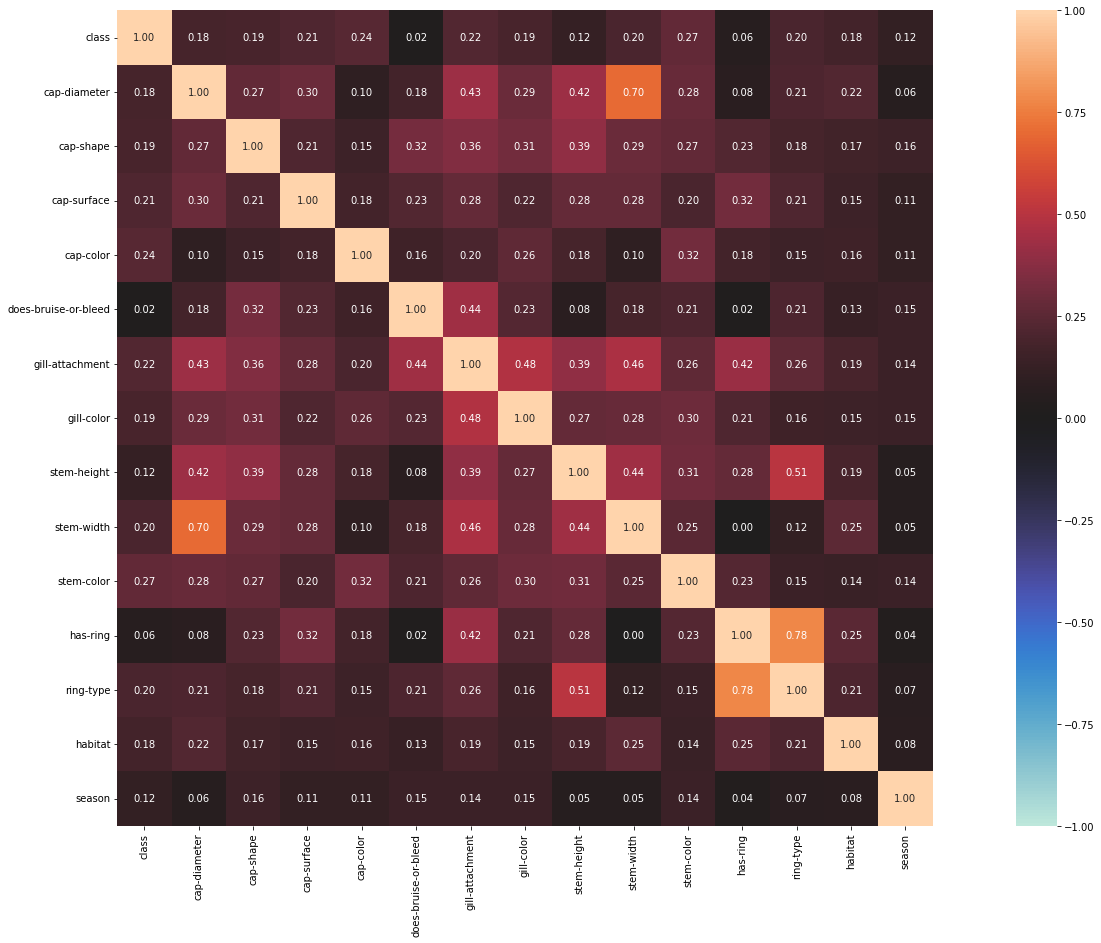

{'ax': <AxesSubplot:>,
 'corr':                          class  cap-diameter  cap-shape  cap-surface  \
 class                 1.000000      0.181139   0.191998     0.214898   
 cap-diameter          0.181139      1.000000   0.267289     0.295676   
 cap-shape             0.191998      0.267289   1.000000     0.213029   
 cap-surface           0.214898      0.295676   0.213029     1.000000   
 cap-color             0.240428      0.097633   0.153246     0.176256   
 does-bruise-or-bleed  0.019428      0.179440   0.324345     0.226470   
 gill-attachment       0.224657      0.427099   0.356496     0.276815   
 gill-color            0.191267      0.292152   0.313682     0.217880   
 stem-height           0.121593      0.422560   0.393673     0.280168   
 stem-width            0.197368      0.695330   0.293014     0.280911   
 stem-color            0.272837      0.282887   0.267729     0.202015   
 has-ring              0.057379      0.077024   0.225062     0.316396   
 ring-type          

In [ ]:
associations(X,figsize=(30,15))

Performing One hot encoding

In [ ]:
X = pd.get_dummies(X, columns = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment',
                                 'gill-color','stem-color','has-ring','ring-type','habitat','season'])

In [ ]:
X['class'].replace(['p', 'e'],[0, 1], inplace=True)

In [ ]:
y = X['class']

In [ ]:
x = X.drop(['class'],axis=1)

Resampling the data to handle imbalance

In [ ]:
import imblearn
from collections import Counter

In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 33888, 1: 27181})
Resample dataset shape Counter({0: 27181, 1: 27181})


Create Train-Validate-Test Split

In [ ]:
x_train, x_rest, y_train, y_rest = train_test_split(x_rus,y_rus, test_size=0.20, random_state=42)

In [ ]:
x_train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
27179,4.88,3.04,5.80,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7155,2.76,3.23,2.36,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
22855,0.84,3.38,2.65,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
35238,6.46,6.33,10.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12928,9.05,10.08,22.80,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif
# compares with target variable to select the features

In [ ]:
def select_feature_f(X_train, y_train):

    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns),
                                    'Scores': fs_f.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,features,Scores
0,class,inf
66,stem-color_w,2543.904306
3,stem-width,2475.219569
1,cap-diameter,2071.670242
40,gill-attachment_p,1889.270945
...,...,...
41,gill-attachment_s,1.450354
52,gill-color_u,1.208000
70,ring-type_e,1.063930
75,ring-type_p,0.738771


In [ ]:
x_validate,x_test,y_validate,y_test =  train_test_split(x_rest,y_rest,test_size=0.50, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

Standardising the data

In [ ]:
cols_to_scale = ['cap-diameter','stem-height','stem-width']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(x_train[cols_to_scale])

#scale selected data
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])

In [ ]:
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [ ]:
x_validate[cols_to_scale] = scaler.transform(x_validate[cols_to_scale])

In [ ]:
x_validate.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
34956,-0.236449,-0.463829,-0.218026,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
985,-1.026576,-0.822342,-1.081610,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21690,-0.097015,-0.194203,-0.044131,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
34967,-0.191830,-0.327534,-0.221956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8550,0.207882,0.777634,0.347871,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Performing PCA for dimensionality reduction

In [ ]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X-self.mean
        cov = np.cov(X.T)
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        u , s, v = np.linalg.svd(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        top= eigenvalues[0:self.n_components]
        print(top.sum()/eigenvalues.sum())
        plt.bar(range(X.shape[1]),s, color ='maroon',width = 0.4)
        plt.xlabel("components")
        plt.ylabel("% variance retained")
        plt.title("variance VS components")
        self.components = eigenvectors[0:self.n_components]
    def transform(self,X):
        X = X - self.mean
        print(np.dot(X,self.components.T))
        return np.dot(X,self.components.T)

0.9615112288105153
[[ 1.14790235  1.10846589  0.59686971 ... -0.22284124 -0.34591963
   0.15450101]
 [ 1.72474096 -0.0337252   0.2639182  ... -0.04090374 -0.012185
   0.04153408]
 [ 1.81267225 -0.5202781   0.49750659 ... -0.01889805 -0.22651363
   0.21627223]
 ...
 [ 0.42511895  0.14661929 -0.06852776 ...  0.14790918  0.37537496
  -0.19973279]
 [ 0.1574344   0.19665582  0.10186169 ... -0.11378332  0.24375982
   0.38610183]
 [ 1.26365883  0.7565047  -0.6909395  ... -0.11092221  0.13563914
  -0.1034484 ]]


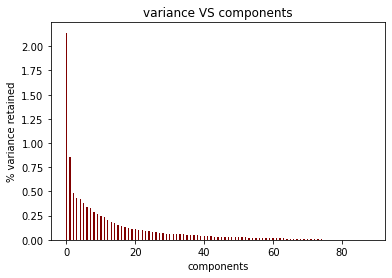

In [ ]:
pca_obj = PCA(n_components=50)
pca_obj.fit(x_train)
x_train_pca = pca_obj.transform(x_train)

In [ ]:
x_test_pca = pca_obj.transform(x_test)
x_validate_pca = pca_obj.transform(x_validate)

[[ 0.48226857 -0.79879929  0.10438617 ... -0.01977983  0.01416159
   0.13875321]
 [-0.24556691  1.081865   -0.54385143 ...  0.03177547  0.02678134
   0.03551693]
 [ 0.83601077 -1.13414252  0.61671829 ...  0.17057665  0.06642066
  -0.00435399]
 ...
 [ 1.56388069 -0.42365889 -1.24894769 ... -0.01567785  0.10503523
  -0.02109882]
 [-1.02047505 -1.72015546  0.43963603 ...  0.06150765 -0.2796224
  -0.1462235 ]
 [ 0.39913013  0.67353853  0.49729215 ... -0.12506546  0.47934589
   0.08016725]]
[[ 5.76936854e-01  3.64892311e-01 -1.72156961e-01 ...  5.46840310e-02
   1.31800953e-01 -1.31206832e-01]
 [ 1.88248772e+00 -1.97488922e-01 -6.73113092e-01 ... -1.62209965e-01
  -1.01627672e-01 -3.42055770e-01]
 [ 2.08744174e-01  6.00998692e-01 -5.92044012e-01 ... -4.84905159e-03
  -6.70564366e-03 -1.50084664e-01]
 ...
 [ 2.57256061e-01  8.27868545e-01 -5.65023392e-04 ... -1.11872010e-01
  -2.27338572e-01  1.50769164e-02]
 [-8.41281321e-01 -3.18620697e-01  1.61472373e-01 ... -2.82590405e-03
  -7.67818956e

**Logistic Regression**

In [ ]:
class LogisticRegression:
  def __init__(self, X, y, learningRate, tolerance, maxIteration):
      self.X=X
      self.y=y
      self.learningRate = learningRate
      self.tolerance =  tolerance
      self.maxIteration = maxIteration

  def addX0(self, X):
    return np.column_stack([np.ones(X.shape[0]),X])

  def sigmoid(self, z):
    sig =  1 / (1 +  np.exp(-z))
    return sig

  def costFunction(self, X, y):
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
    cost = pred_.sum()
    return cost

  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    grad = (sig - y).dot(X)
    return grad

  def gradientDescent(self, X, y):
    self.errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X,y)
      curr = self.costFunction(X, y)
      diff = last - curr
      last = curr

      self.errors.append(curr)
      if diff < self.tolerance:
        print("Model Stopped")
        break

    self.plot_cost(self.errors)
    return

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)


  def evaluate(self, y, y_hat):
    test_error = []
    y = (y == 1)
    y_hat = (y_hat == 1)

    accuracy = (y==y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()


    fScore = 2* (precision*recall) / (precision+recall)
    return fScore, recall, precision, accuracy

  def run_model(self,X,y, X_test, y_test ):
    self.X_train =  self.X
    self.y_train = self.y
    self.X_test = X_test
    self.y_test = y_test
    self.w = np.ones(self.X.shape[1], dtype= np.float64) * 0
    self.gradientDescent(self.X, self.y)

    y_hat_train = self.predict(self.X)
    fScore, accuracy, recall, precision = self.evaluate(self.y, y_hat_train)

    print("Training set Performance")
    #print(confusion_matrix(self.y, y_hat_train))
    print("F1_Score is :" , fScore)
    print("Accuracy is :" , accuracy)
    print("Precision is :" , precision)
    print("Recall is :" , recall)


    y_hat_test = self.predict(self.X_test)
    fScore, accuracy, recall, precision = self.evaluate(self.y_test, y_hat_test)

    print("Test set Performance")
    #print(confusion_matrix(self.y_test, y_hat_test))
    print("F1_Score is :" , fScore)
    print("Accuracy is :" , accuracy)
    print("Precision is :" , precision)
    print("Recall is :" , recall)

  def plot_cost(self, cost_sequence):
        # Data for plotting
    s = np.array(cost_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='iterations', ylabel='cost',
                title='cost trend')
    ax.grid()

    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()

100%|██████████| 4000/4000 [04:20<00:00, 15.33it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


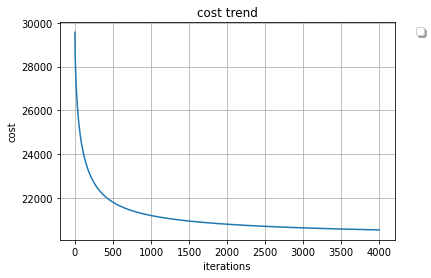

Training set Performance
F1_Score is : 0.7885128021325687
Accuracy is : 0.809977449491463
Precision is : 0.782910621076594
Recall is : 0.7681564245810056
Test set Performance
F1_Score is : 0.7887021809081158
Accuracy is : 0.8007259528130671
Precision is : 0.782560706401766
Recall is : 0.7770341669601972


100%|██████████| 4000/4000 [04:04<00:00, 16.37it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


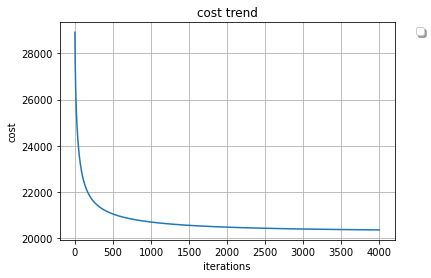

Training set Performance
F1_Score is : 0.7881475508969966
Accuracy is : 0.8097473422614938
Precision is : 0.7824967233093426
Recall is : 0.7676701570680629
Test set Performance
F1_Score is : 0.7890694766922665
Accuracy is : 0.8018148820326679
Precision is : 0.7827446651949963
Recall is : 0.7767229254571026


100%|██████████| 4000/4000 [03:58<00:00, 16.78it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


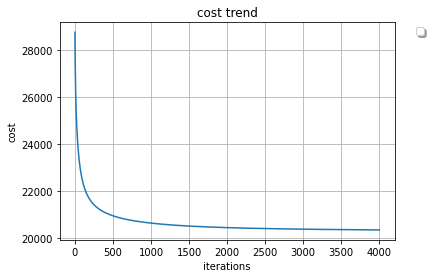

Training set Performance
F1_Score is : 0.7878407741762057
Accuracy is : 0.8092871278015555
Precision is : 0.7822207914645083
Recall is : 0.7675017458100558
Test set Performance
F1_Score is : 0.7898589537582574
Accuracy is : 0.8029038112522686
Precision is : 0.7834805003679176
Recall is : 0.7772312016865777


100%|██████████| 4000/4000 [04:08<00:00, 16.13it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


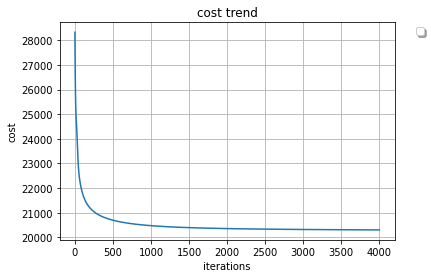

Training set Performance
F1_Score is : 0.788246623815816
Accuracy is : 0.8098854065994754
Precision is : 0.7825887005909541
Recall is : 0.7677340546200158
Test set Performance
F1_Score is : 0.7894266833363099
Accuracy is : 0.8021778584392014
Precision is : 0.7831125827814569
Recall is : 0.7770745428973277


  0%|          | 4/4000 [00:00<05:01, 13.26it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model Stopped


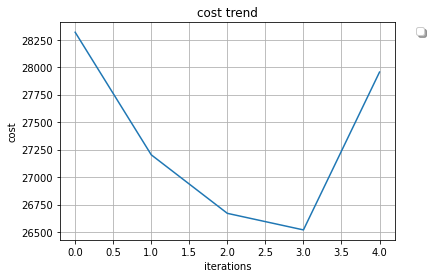

Training set Performance
F1_Score is : 0.726720298311639
Accuracy is : 0.9686593952781997
Precision is : 0.6359999080227184
Recall is : 0.5814846534243169
Test set Performance
F1_Score is : 0.7320297438722115
Accuracy is : 0.9647912885662432
Precision is : 0.6420161883738043
Recall is : 0.5897492788994897


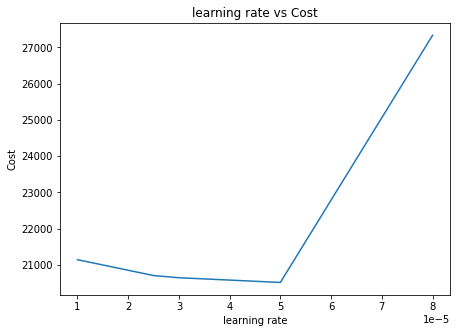

In [ ]:
lr_error = []
reg_cost = []
learning_rate = [0.00001,0.000025,0.00003,0.00005,0.00008]

for j in learning_rate:
    reg_logit = LogisticRegression(x_train,y_train,learningRate = j, tolerance = 0.00005, maxIteration = 4000)
    reg_logit.run_model(x_train, y_train,x_validate, y_validate)
    lr_error.append(np.mean(reg_logit.errors))

plt.figure(figsize=(7,5))
plt.plot(learning_rate,lr_error)
plt.xlabel('learning rate')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

 79%|███████▉  | 3165/4000 [00:54<00:14, 57.77it/s]
No handles with labels found to put in legend.


Model Stopped


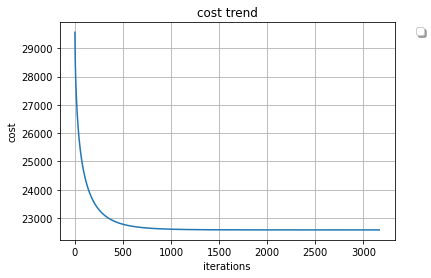

Training set Performance
F1_Score is : 0.7622136721546171
Accuracy is : 0.7840673753969349
Precision is : 0.755570374117593
Recall is : 0.7415451577801959
Test set Performance
F1_Score is : 0.7692033505613973
Accuracy is : 0.7833030852994556
Precision is : 0.7617733627667402
Recall is : 0.7556022408963585


In [ ]:
#Run model
lr = LogisticRegression(x_train_pca, y_train, learningRate=0.00001, tolerance= 0.00005, maxIteration=4000)
lr.run_model(x_train_pca, y_train,x_validate_pca, y_validate)

100%|██████████| 4000/4000 [04:25<00:00, 15.08it/s]
No handles with labels found to put in legend.


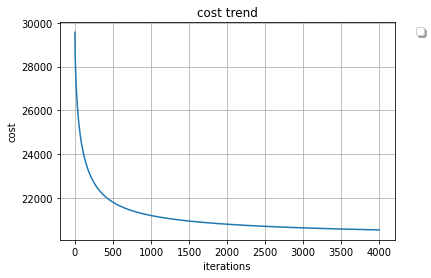

Training set Performance
F1_Score is : 0.7885128021325687
Accuracy is : 0.809977449491463
Precision is : 0.782910621076594
Recall is : 0.7681564245810056
Test set Performance
F1_Score is : 0.7890401146131805
Accuracy is : 0.8168335187245087
Precision is : 0.7833363987493103
Recall is : 0.7630758572913059


In [ ]:
#Run model
lr = LogisticRegression(x_train, y_train, learningRate=0.00001, tolerance= 0.00005, maxIteration=4000)
lr.run_model(x_train, y_train,x_test, y_test)

 79%|███████▉  | 3165/4000 [01:23<00:22, 37.77it/s]


Model Stopped


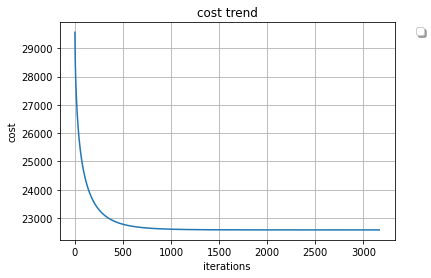

Training set Performance
F1_Score is : 0.7622136721546171
Accuracy is : 0.7840673753969349
Precision is : 0.755570374117593
Recall is : 0.7415451577801959
Test set Performance
F1_Score is : 0.7644333570919458
Accuracy is : 0.7953281423804227
Precision is : 0.7568512047084789
Recall is : 0.7358490566037735


In [ ]:
lr = LogisticRegression(x_train_pca, y_train, learningRate=0.00001, tolerance= 0.00005, maxIteration=4000)
lr.run_model(x_train_pca, y_train,x_test_pca, y_test)

Support Vector Machine

In [ ]:
y_train_svm = y_train
y_train_svm = np.where(y_train_svm ==0,1,-1)
y_test_svm = y_test
y_test_svm = np.where(y_test_svm ==0,1,-1)
y_validate_svm = y_validate
y_validate_svm = np.where(y_validate_svm ==0,1,-1)

**This version of SVM takes long to fit. Please run on only small dataset**

In [ ]:
from scipy import optimize
from scipy.optimize import Bounds

class SoftMarginSVM:
    def __init__(self, c):
        self.c = c

    def fit(self, X, y):
        N = len(y)

        #mutiply vector by matrix
        Xy = X*y[:, np.newaxis]
        GramXy = np.matmul(Xy, Xy.T)

        def ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        def derivativeld0(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        alpha = np.ones(N)
        bounds_alpha = Bounds(np.zeros(N), np.full(N, self.c))

        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y})

        optRes = optimize.minimize(fun=lambda a: -ld0(GramXy, a),
                                   x0=alpha,
                                   method='SLSQP',
                                   jac=lambda a: -derivativeld0(GramXy, a),
                                   constraints=constraints, bounds = bounds_alpha)
        self.alpha = optRes.x

        self.w = np.sum((self.alpha[:, np.newaxis]* Xy), axis =0)

        epsilon = 1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        for i in range(len(self.supportVectors)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)

        self.intercept = sum(b) / len(b)

    def predict(self, X):
        estimate = np.dot(X, self.w) + self.intercept
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [ ]:
import time
start_time = time.time()
model = SoftMarginSVM(c = 5)
model.fit(x_train_pca[0:2000], y_train_svm[0:2000])
print("--- %s mins ---" % ((time.time() - start_time)/60.0))
#2468.232047557831

--- 80.98379719257355 seconds ---


In [ ]:
import sys
np.set_printoptions(threshold = sys.maxsize)
y_test_predicted = model.predict(x_test.values)
y_test_predicted

**As the train time for regular SVM is too large we are proceeding with SMO approach**

In [ ]:
class SVM():
    def __init__(self, max_iter=100, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gauss
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)
    def kernel_gauss(self,x1, x2, sigma=1):
        return np.exp(- (np.linalg.norm(x1 - x2, 2)) ** 2 / (2 * sigma ** 2))
    #def predict_proba(self, X):
        #return np.dot(self.w.T, X.T) + self.b

In [ ]:
data_x = np.asarray(x_train)
data_y = np.asarray(y_train_svm)
print("shape of x: "+ str(data_x.shape), "shape of y: "+str(data_y.shape))

shape of x: (43489, 89) shape of y: (43489,)


In [ ]:
data_x_test = np.asarray(x_test)
data_y_test = np.asarray(y_test_svm)
print("shape of x: "+ str(data_x_test.shape), "shape of y: "+str(data_y_test.shape))

shape of x: (43489, 89) shape of y: (43489,)


In [ ]:
data_x_validate = np.asarray(x_validate)
data_y_validate = np.asarray(y_validate_svm)
print("shape of x: "+ str(data_x_validate.shape), "shape of y: "+str(data_y_validate.shape))

shape of x: (5436, 89) shape of y: (5436,)


In [ ]:
model = SVM(max_iter=3, kernel_type='linear', C=5.0, epsilon=0.001)
start_time = time.time()
model.fit(data_x,data_y)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

Iteration number exceeded the max of 3 iterations
--- 16.738575824101765 mins ---


In [ ]:
Y_predicted = [model.predict(x) for x in data_x_validate]
cm = confusion_matrix(data_y_validate, Y_predicted)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(cm)
print(accuracy)

[[2261  494]
 [ 745 1936]]
0.772075055187638


In [ ]:
model = SVM(max_iter=3, kernel_type='gaussian', C=3.0, epsilon=0.001)
start_time = time.time()
model.fit(x_train_pca,data_y)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

Iteration number exceeded the max of 3 iterations
--- 11.489021480083466 mins ---


In [ ]:
Y_predicted = [model.predict(x) for x in x_test_pca]
cm = confusion_matrix(data_y_test, Y_predicted)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(cm)
print(accuracy)

[[2117  580]
 [ 766 1974]]
0.7524370057016737


In [ ]:
model = SVM(max_iter=3, kernel_type='quadratic', C=3.0, epsilon=0.001)
start_time = time.time()
model.fit(data_x,data_y)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

Iteration number exceeded the max of 3 iterations
--- 16.67631743748983 mins ---


In [ ]:
Y_predicted = [model.predict(x) for x in data_x_validate]
cm = confusion_matrix(data_y_validate, Y_predicted)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(cm)
print(accuracy)

[[2338  417]
 [ 939 1742]]
0.7505518763796909


NAIVE BAYES

In [ ]:
class NaiveBayes:

    def __init__(self,X_train,X_test,y_train,y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def fit_dist(self,data):
        mu = np.mean(data)
        sigma = np.std(data)
        dist = norm(mu,sigma)
        return dist



    def probability(self,X,prior,distribution):
        self.num_features = self.X_test.shape[1]
        res = []
        for j in range(self.num_features):
            for k,v in distribution.items():
                if math.isnan(v.pdf(X[j])):
                    res.append(1)
                else:
                    res.append(v.pdf(X[j]))
        res = res[0::self.num_features+1]
        a = np.prod(res, axis=None, dtype=None, out=None)
        #print(a)
        return a*prior

    def run_model(self):

        self.num_features = self.X_train.shape[1]

        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]



        self.prior_y0 = len(self.X0_train) / len(self.X_train)
        self.prior_y1 = len(self.X1_train) / len(self.X_train)



        self.dist1 = {}
        self.dist2 = {}

        for i in range(self.num_features):
            self.dist1['dist_'+'X'+str(i+1)+'y0'] = self.fit_dist(self.X0_train[:,i])
            self.dist2['dist_'+'X'+str(i+1)+'y1'] = self.fit_dist(self.X1_train[:,i])
        #print(self.dist1)


    def predict_test(self):

        right = 0
        wrong = 0
        count0 = 0
        count1 = 1


        train_start_time = datetime.now()
        for sample, target in zip(self.X_test[0:100], self.y_test[0:100]):

            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)


            #print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            #print('p(y=1 | %s) = %.3f' % (sample, py1*100))

            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100]), target))
            if (np.argmax([py0*100,py1*100]) == target):
                #print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                print('class being misclassified is',target)
                wrong+=1
        train_end_time = datetime.now()
        train_time = train_end_time - train_start_time
        print('testing error :',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('Test Time', train_time)

    def predict_train(self):

        right = 0
        wrong = 0
        count0 = 0
        count1 = 1

        test_start_time = datetime.now()
        for sample, target in zip(self.X_train, self.y_train):

            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)

            #print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            #print('p(y=1 | %s) = %.3f' % (sample, py1*100))


            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100]), target))
            if (np.argmax([py0*100,py1*100]) == target):
                #print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                print('class being misclassified is',target)
                #print('Wrong\n')
                wrong+=1
        test_end_time = datetime.now()
        test_time = test_end_time - test_start_time
        print('training Error:',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('Train Time', test_time)

In [ ]:
nb = NaiveBayes(X_train = np.asarray(x_train),y_train = y_train, X_test = np.asarray(x_validate),y_test = y_validate)

In [ ]:
nb.run_model()

In [ ]:
nb.predict_test()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


model predicted class 1 and the truth was 1 

model predicted class 0 and the truth was 0 

model predicted class 1 and the truth was 0 

class being misclassified is 0
model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

class being misclassified is 0
model predicted class 0 and the truth was 0 

model predicted class 0 and the truth was 0 

model predicted class 1 and the truth was 0 

class being misclassified is 0
model predicted class 0 and the truth was 0 

model predicted class 1 and the truth was 0 

class being misclassified is 0
model predicted class 0 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

class being misclassified is 0
model predicted class 0 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 0 and the truth was 1 

class being misclassified is 1
model predicted class 1 and the truth was 1 

model predicted class 1 and the 

**NEURAL NETWORK**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Activation, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model = Sequential()
model.add(Dense(89, input_dim=89, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
import time
start_time = time.time()
history=model.fit(
    x_train,y_train,
    epochs=300, #can change the epoch
   validation_split=0.15, verbose=3, batch_size=256)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))
#2468.232047557831


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 2/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78/300
Epoch 79/300
Epoch 

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[1.0000000e+00, 1.1388200e-09],
       [9.9697776e-12, 1.0000000e+00],
       [1.0000000e+00, 4.7747695e-10],
       ...,
       [1.0000000e+00, 2.0600925e-09],
       [1.0000000e+00, 8.2950577e-11],
       [1.0000000e+00, 3.9855919e-09]], dtype=float32)

In [ ]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

Streaming output truncated to the last 5000 lines.
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
1
0
0
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
1
0
0
1
0
0
0
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
0
0
1
1
0
1
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
0
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
0
1
0
0
1
0
0
0
1

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_label))

Accuracy: 0.999
Recall: 0.999


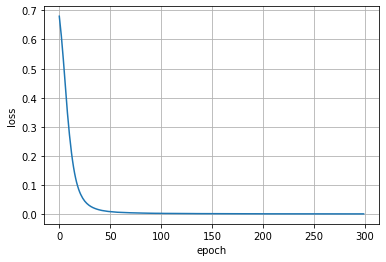

In [ ]:
loss=history.history['loss']
def plot(loss):
        axis=list(range(0, len(loss),1))
        fig, ax = plt.subplots()
        ax.plot(axis, loss)
        ax.set_xlabel('epoch')
        ax.set_ylabel('loss')
        ax.grid()
        plt.show()
plot(loss)